# Generate learning curves for different sigma values

In [1]:
import numpy as np
import sys
sys.path.insert(0, '/home/misa/APDFT/prototyping/atomic_energies/')
import qml_interface as qi

In [2]:
def save(set_sizes, error, std, fname):
    big_array = np.array([set_sizes, error, std]).T
#    big_array = np.flip(big_array, axis=0)
    np.savetxt(fname, big_array, delimiter='\t', header='set_size\t error \t error_std')

In [3]:
data_file = 'atomic_energies_cutoff.txt'
path = '/home/misa/APDFT/prototyping/atomic_energies/results/slice_ve38/paths_atomic_energies'
paths=[]
with open(path, 'r') as f:
    for line in f:
        paths.append(line.rstrip('\n')+data_file)

In [5]:
# load data (with mic)
# paths=qi.wrapper_alch_data()
alchemy_data, molecule_size = qi.load_alchemy_data(paths)

In [46]:
np.sqrt(molecule_size.mean())*2.32411061e-02

0.08575873335103056

In [6]:
# prepare representations and labels
LABEL_VALUE = 'atomisation'
# DELTA = True
local_reps = qi.generate_atomic_representations(alchemy_data, molecule_size)
local_labels = qi.generate_label_vector(alchemy_data, molecule_size.sum(), value=LABEL_VALUE)

In [7]:
sigmas = np.logspace(-1, 10, 11, base=2)#np.logspace(14, 16, 3, base=2)
lam = 1e-06 #float(lines[2].split('\t')[1])
print(sigmas)

[5.00000000e-01 1.07177346e+00 2.29739671e+00 4.92457765e+00
 1.05560633e+01 2.26274170e+01 4.85029301e+01 1.03968307e+02
 2.22860944e+02 4.77712892e+02 1.02400000e+03]


In [8]:
fname = '/home/misa/APDFT/prototyping/atomic_energies/results/analyse_learning/plot_lcurve_vs_sigma/'
cradius = 4.0
for sigma in sigmas:
    # define number of training points for which MAE is calculated
    set_sizes = np.logspace(0,9, 10, base=2).astype(int)
    #set_sizes = [512]
    # calculate error for every training point size
    error_cv = np.zeros(len(set_sizes))
    error_std = np.zeros(len(set_sizes))
    for idx, tr_size in enumerate(set_sizes):
            error_cv[idx], error_std[idx] = qi.crossvalidate(local_reps, local_labels, molecule_size, tr_size, sigma, lam, molecule=False, num_cross=3)
            save(set_sizes, error_cv, error_std, fname+f'lcurve_cutoff_{cradius}_sigma_{sigma}.txt')

# Load Data and Analysis Data

In [35]:
import glob
fname = '/home/misa/APDFT/prototyping/atomic_energies/results/analyse_learning/plot_lcurve_vs_sigma/'

In [36]:
paths_lcurves = list(set(glob.glob(fname+'lcurve_*')) - set(glob.glob(fname+'lcurve_cutoff*')))#glob.glob(fname+'lcurve_*')
data = dict()
for p in paths_lcurves:
    key = np.round(float(p.split('/')[-1].strip('.txt').split('_')[-1]), 2)
    
    data[key] = np.loadtxt(p)


In [37]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})
from matplotlib import cm as cmx
import matplotlib.colors as colors

In [38]:
NUM_COLORS = len(data.keys())
# cm_jet = plt.get_cmap('jet')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm_jet)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

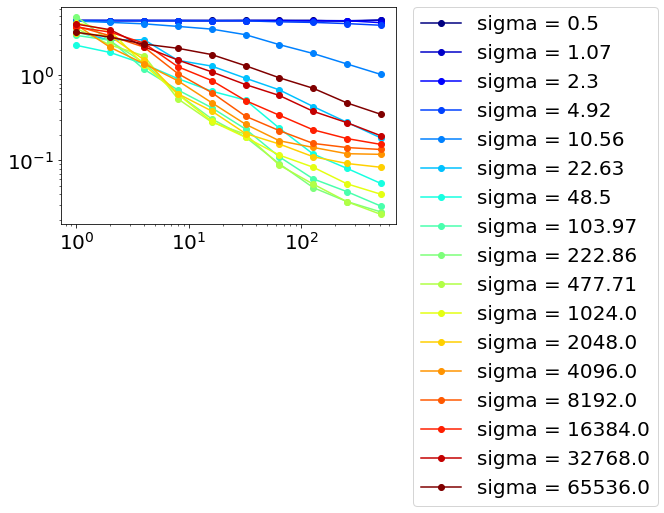

In [39]:
fig, ax = plt.subplots(1,1)


ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for key in sorted(data.keys()):
    kdata = data[key]
    ax.plot(kdata[:,0], kdata[:,1], '-o', label=f'sigma = {key}')
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [40]:
data[222.86]

array([[1.00000000e+00, 4.87870520e+00, 1.25455116e+00],
       [2.00000000e+00, 2.51282442e+00, 4.20902742e-01],
       [4.00000000e+00, 1.40251755e+00, 1.56588445e-01],
       [8.00000000e+00, 6.02903142e-01, 1.08080755e-01],
       [1.60000000e+01, 3.07580092e-01, 2.66482535e-02],
       [3.20000000e+01, 1.88071761e-01, 1.87157092e-03],
       [6.40000000e+01, 9.13337202e-02, 1.03037833e-02],
       [1.28000000e+02, 4.79310597e-02, 3.23810216e-03],
       [2.56000000e+02, 3.28379703e-02, 2.58249368e-03],
       [5.12000000e+02, 2.48371228e-02, 3.01382823e-03]])

In [41]:
data[477.71]

array([[1.00000000e+00, 3.55094593e+00, 6.82292894e-02],
       [2.00000000e+00, 2.26735763e+00, 3.24031996e-01],
       [4.00000000e+00, 1.69034701e+00, 3.35912057e-01],
       [8.00000000e+00, 5.28660504e-01, 4.11936902e-02],
       [1.60000000e+01, 2.82026913e-01, 1.33271814e-02],
       [3.20000000e+01, 2.02762062e-01, 3.43422048e-02],
       [6.40000000e+01, 8.81290992e-02, 6.98922405e-03],
       [1.28000000e+02, 5.27016037e-02, 7.51150493e-03],
       [2.56000000e+02, 3.27414436e-02, 7.04018936e-04],
       [5.12000000e+02, 2.32411061e-02, 1.09690128e-03]])